IMPORTS

In [88]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt

INIT

In [149]:
df = pd.read_csv("./datasets/german_credit_data.csv")

ОПИСАНИЕ ДАТАСЕТА
1. Age (numeric)
2. Sex (text: male, female)
3. Job (numeric: 0 - unskilled and non-resident, 1 - unskilled and resident, 2 - skilled, 3 - highly skilled)
4. Housing (text: own, rent, or free)
5. Saving accounts (text - little, moderate, quite rich, rich)
6. Checking account (numeric, in DM - Deutsch Mark)
7. Credit amount (numeric, in DM)
8. Duration (numeric, in month)
9. Purpose (text: car, furniture/equipment, radio/TV, domestic appliances, repairs, education, business, vacation/others)

DTYPES

In [74]:
print(df.info(verbose=True))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
dtypes: int64(5), object(5)
memory usage: 78.3+ KB
None


Колонку Unnamed:0 сделаем индексом и переименнуем

In [83]:
df.set_index('Unnamed: 0', inplace=True)
df.index.rename("ID", inplace=True)


Посмотрим на уникальные данные столбцов с типом данных object

In [87]:
object_col = ["Sex", "Housing", "Saving accounts", "Checking account", "Purpose"]
for col in object_col:
    print(col, df[col].unique())

Sex ['male' 'female']
Housing ['own' 'free' 'rent']
Saving accounts [nan 'little' 'quite rich' 'rich' 'moderate']
Checking account ['little' 'moderate' nan 'rich']
Purpose ['radio/TV' 'education' 'furniture/equipment' 'car' 'business'
 'domestic appliances' 'repairs' 'vacation/others']


Построим круговые диаграммы

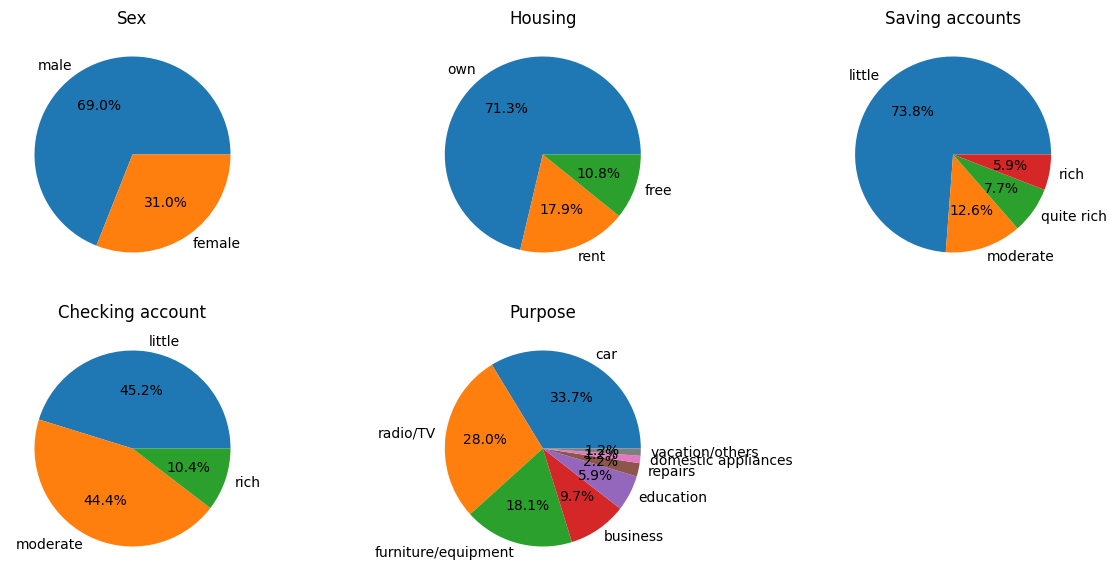

In [151]:
counts = df[object_col].apply(lambda x: x.value_counts(), result_type='reduce')
plt.rcParams['figure.figsize'] = [15, 7]
def plotPies(x):
    i = 1
    for c in x:
        plt.subplot(2, 3, i)
        
        plt.pie(c, autopct='%.1f%%', labels=c.index)
        plt.title(c.index.name)
        i += 1
plotPies(counts)


Потерялись Nan'ы, поэтому вставим значения вместо Nan'ов. Столбцы с Nan'оми содержат информацию об объеме денежных средств на счетах. 
Поэтому в данном случае Nan обозначает что на счету денег нет.
Можем вместо Nan вставить 'empty'.

In [152]:
df['Checking account'] = df['Checking account'].fillna(value='empty')
df['Saving accounts'] = df['Saving accounts'].fillna('empty')



Выведем круговые диаграммы снова

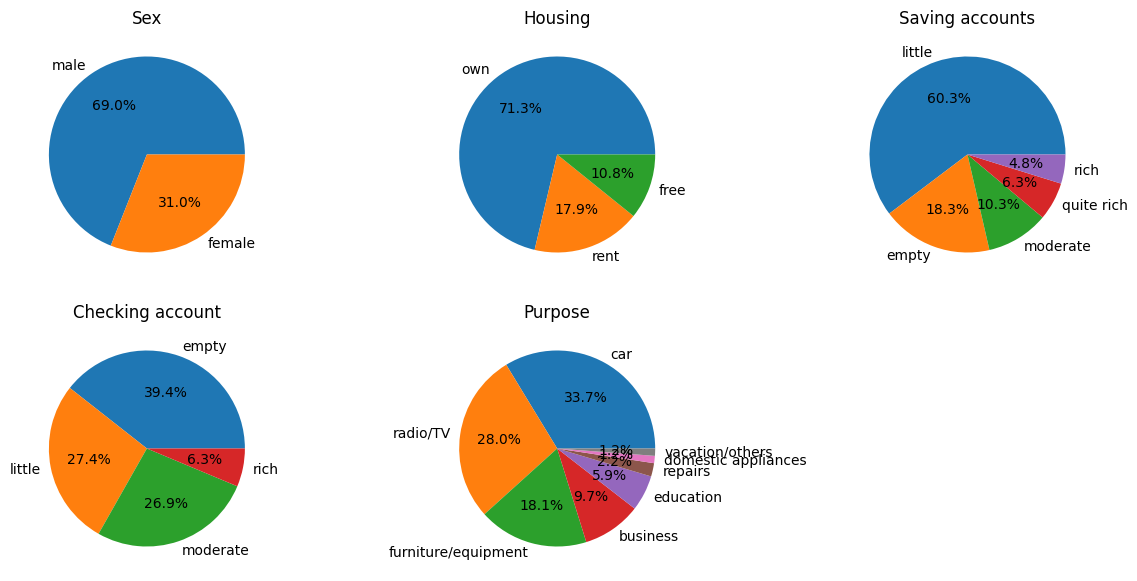

In [153]:
plt.rcParams['figure.figsize'] = [15, 7]
plotPies(df[object_col].apply(lambda x: x.value_counts(), result_type='reduce'))

1. Столбец Sex можно превратить в бинарный;
2. Housing Saving в числовой (Label Encoder) по степени владения:
    1) 0 : free;
    2) 1 : rent;
    3) 2 : own;
3. Saving account в числовой (Label Encoder) по объему сбережений;
4. Checking account аналогично с п.3;
5. Purpose запихнем в Binary Encoder.


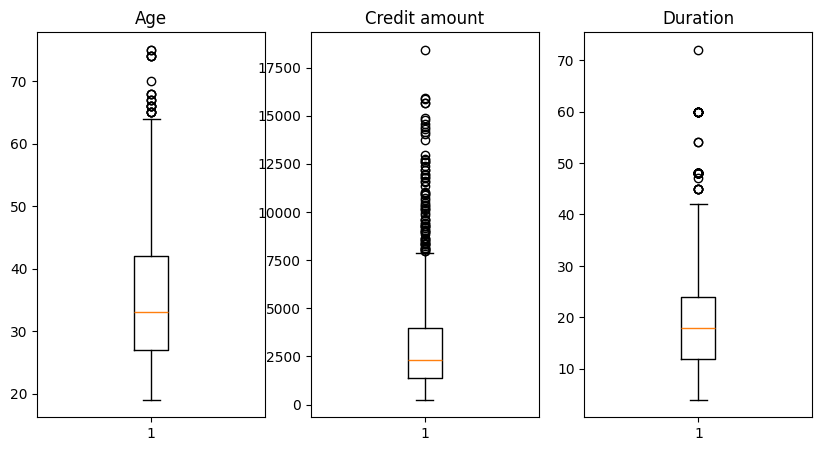

In [166]:
plt.rcParams['figure.figsize'] = [10, 5]

i = 1
digits = ['Age', 'Credit amount', 'Duration']
for d in digits:
    plt.subplot(1,3,i)
    plt.boxplot(df[d])
    plt.title(d)
    i += 1


Небольшие выбросы по возрасту и по длительности кредитования.
Большие выбросы по количеству денег, которые хотят взять в кредит.

Попробуем исследовать корреляцию между этими тремя величинами

<Axes: >

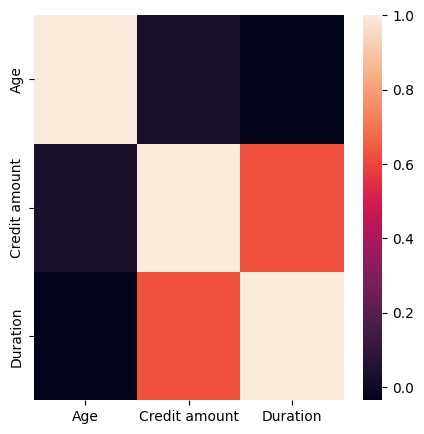

In [162]:
plt.rcParams['figure.figsize'] = [5, 5]
sns.heatmap(df[digits].corr())

Отсуда видим почти отсутвующую корреляцию между возрастом и длительностью или суммой кредита. Но высокую корреляцию между сроком кредита и суммой кредита.

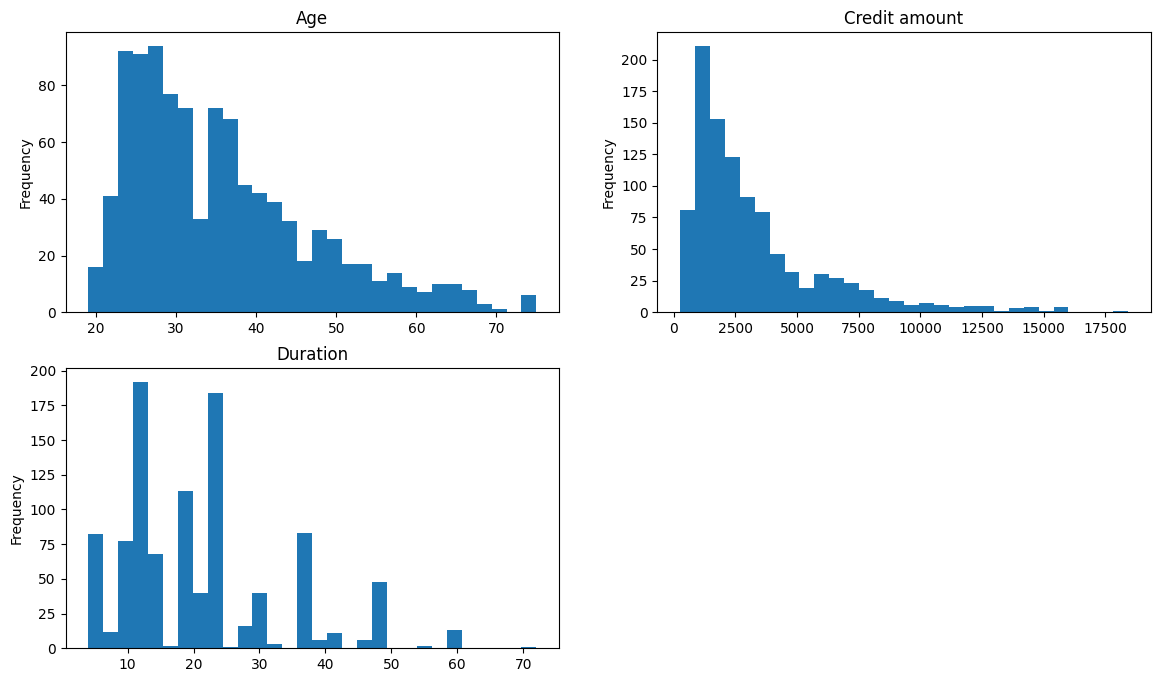

In [180]:
plt.rcParams['figure.figsize'] = [14, 8]
i = 1
for d in digits:
    plt.subplot(2, 2, i)
    df[d].plot.hist(bins= 30)
    plt.title(d)
    i += 1

Длительность кредита на 60-70 лет?!